[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/deJong_Mackay_2022/box_sensitivities.ipynb)   
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/deJong_Mackay_2022/box_sensitivities.ipynb)   
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/deJong_Mackay_2022/box_sensitivities.ipynb)

In [5]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import Settings0D
from PySDM_examples.deJong_Mackay_2022 import run_box_breakup
from atmos_cloud_sim_uj_utils import show_plot
import numpy as np

from PySDM.dynamics.collisions.coalescence_efficiencies import ConstEc, Straub2010Ec
from PySDM.dynamics.collisions.breakup_fragmentations import Gaussian, AlwaysN, Straub2010Nf
from PySDM.physics.constants import si

## Sensitivity to Ec (coalescence efficiency)

finished Ec=1.0
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.9894209e+05 3.9800000e+00 9.9894209e+05 0.0000000e+00]
 [1.0427200e+03 0.0000000e+00 1.0427200e+03 0.0000000e+00]]
finished Ec=0.95
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.45844721e+06 0.00000000e+00 1.38634288e+06 6.95793700e+04]
 [1.36880900e+04 0.00000000e+00 1.29836300e+04 6.53250000e+02]]
finished Ec=0.9
[[      0.         0.         0.         0.  ]
 [2328015.86       0.   2092240.    221574.96]
 [ 216922.67       0.    195214.42   20492.5 ]]
finished Ec=0.8
[[      0.         0.         0.         0.  ]
 [6371663.3        0.   5075670.33 1227194.94]
 [9811881.05       0.   7878457.51 1836463.3 ]]
finished Straub
[[      0.         0.         0.         0.  ]
 [1012653.68       0.   1010057.24    2432.83]
 [   9148.46       0.      7862.44    1201.41]]


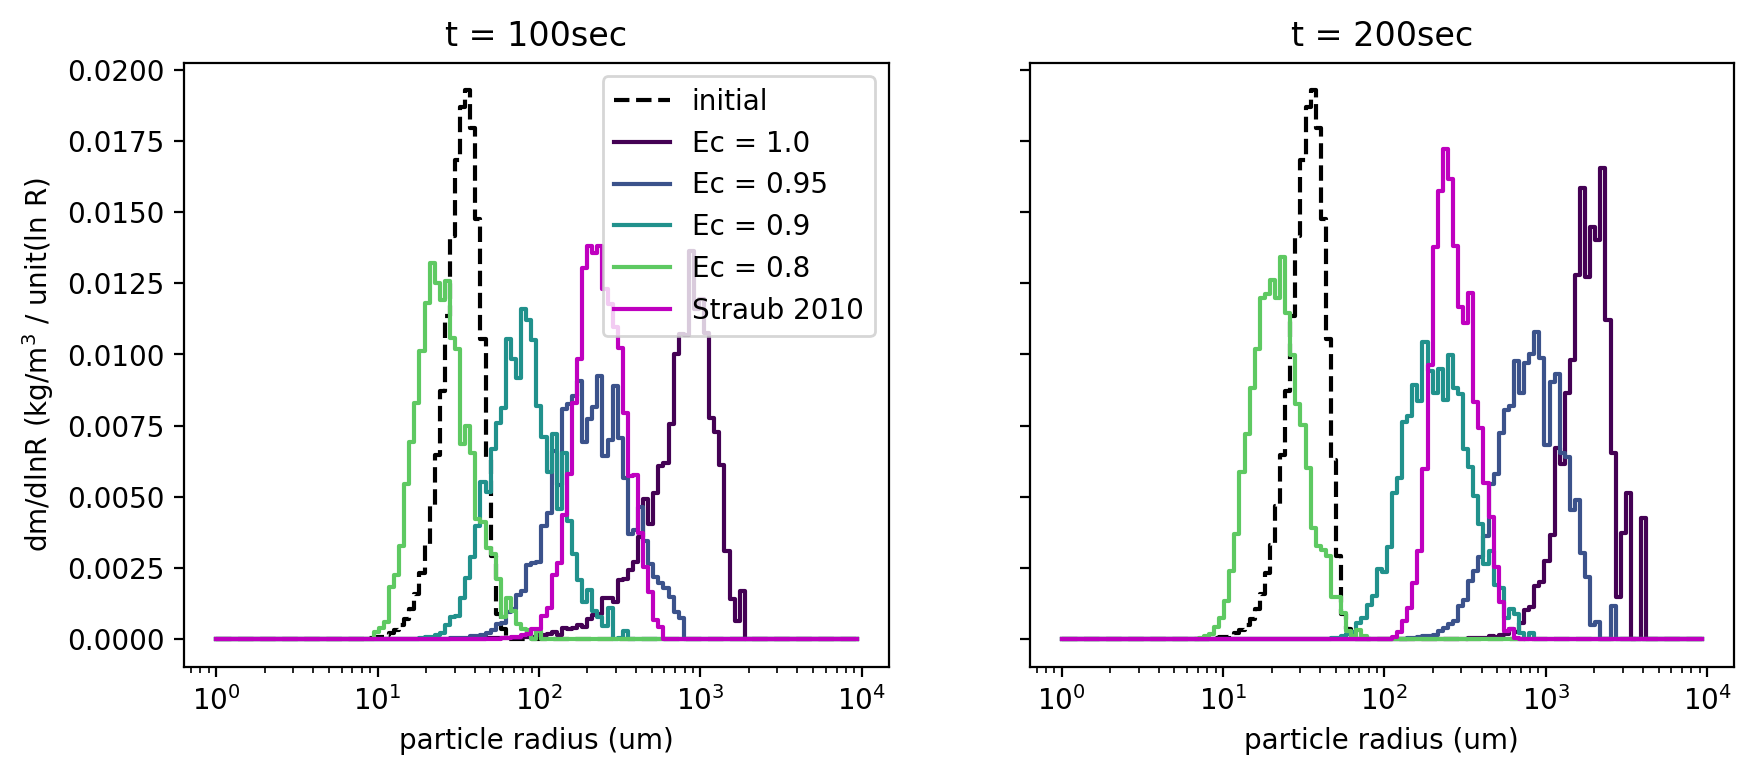

HTML(value="<a href='./fig3_Ec_sensitivity.pdf' target='_blank'>./fig3_Ec_sensitivity.pdf</a><br>")

In [2]:
rmin = 0.1 * si.um
vmin = 4/3 * np.pi * rmin**3
settings = Settings0D(AlwaysN(n=8, vmin=vmin))

settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
    np.log10(1.0 * si.um), np.log10(10000 * si.um), num=128, endpoint=True
)

settings.warn_overflows = False
t_steps = [0, 100, 200]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [1.0, 0.95, 0.9, 0.8]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
ax[1].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        if Ec == 1.0:
            lbl = 'Ec = 1.0'
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Straub2010Ec()
(x,y,rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    lbl = 'Straub 2010'
    ax[j-1].step(x,y[j]*settings.rho, color='m', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Straub")
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[0].legend()
ax[0].set_title("t = 100sec")
ax[1].set_title("t = 200sec")
show_plot('fig3_Ec_sensitivity.pdf')

## Sensitivity to n_f

finished nf=1
[[     0.              0.              0.              0.        ]
 [833103.66666667      0.         791434.525       41662.075     ]]
finished nf=4
[[     0.              0.              0.              0.        ]
 [970292.51666667      0.         923177.05833333  46720.58333333]]
finished nf=16
[[      0.               0.               0.               0.        ]
 [2044619.525            0.         1942340.74166667   91012.28333333]]
finished nf=64
[[       0.                0.                0.                0.        ]
 [23766398.66666667        0.         22578335.89166667   719255.11666667]]
4.768389119586232e-13 [[      0.               0.               0.               0.        ]
 [1352356.55             0.         1283106.99166667   56996.79166667]]
1.192097279896558e-13 [[      0.               0.               0.               0.        ]
 [3034339.68333333       0.         2884502.8          99700.21666667]]
2.980243199741395e-14 [[      0.               0

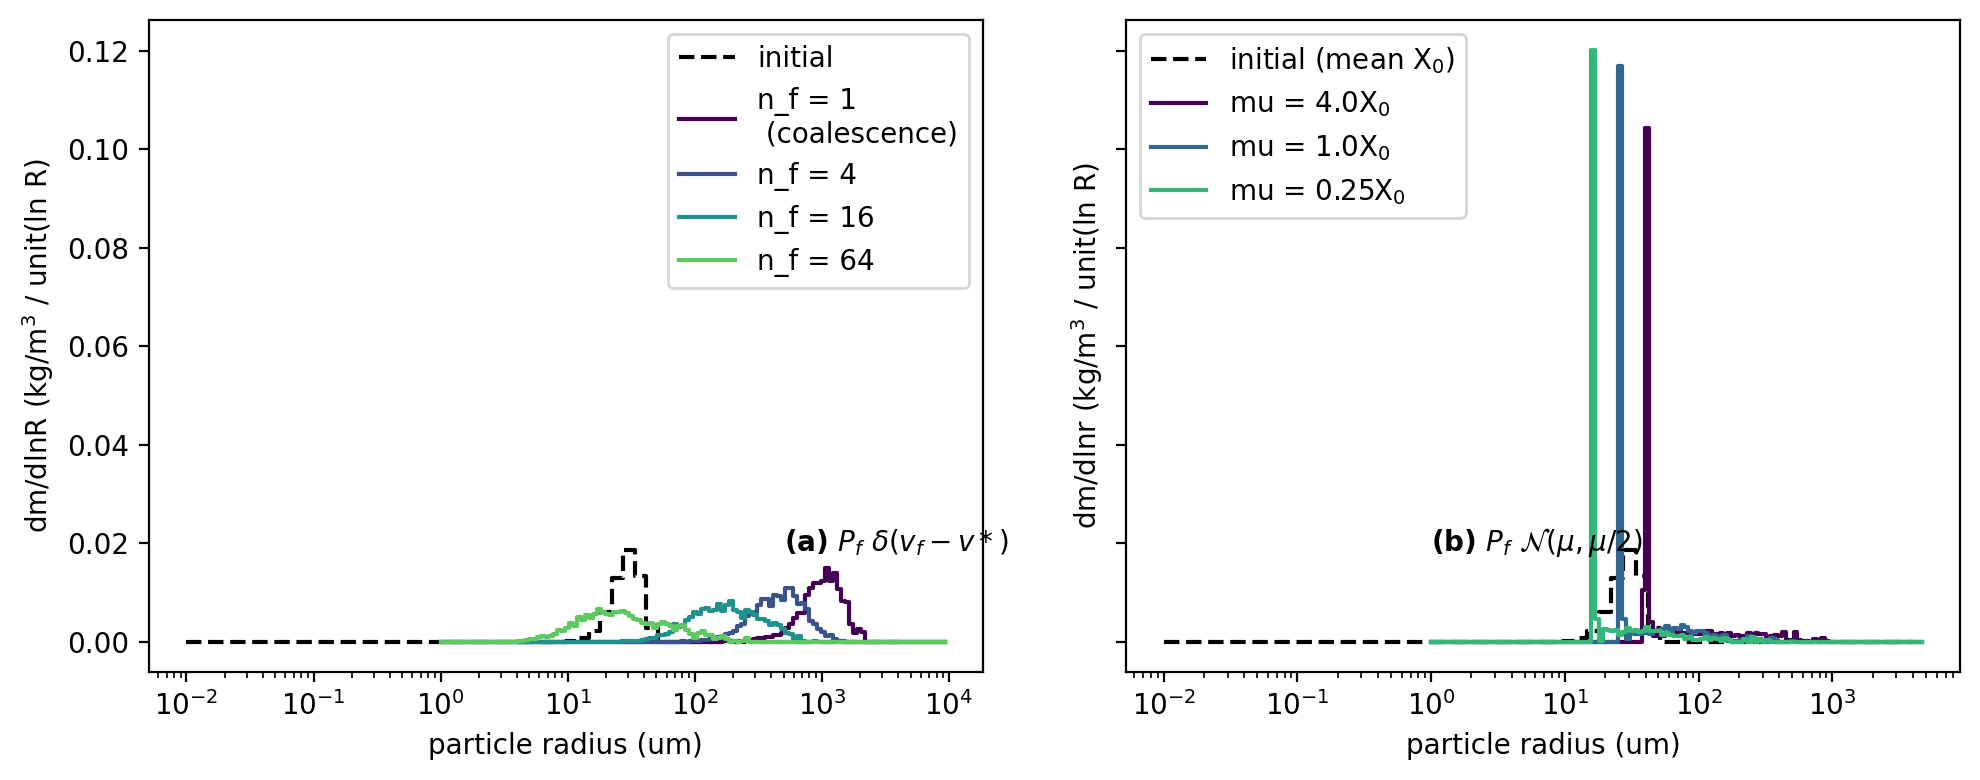

HTML(value="<a href='./fig4_Pf_sensitivity_constEc.pdf' target='_blank'>./fig4_Pf_sensitivity_constEc.pdf</a><…

In [3]:
# Constant n_f
t_steps = [0, 120]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []
nf_vals = [1, 4, 16, 64]

(x,y,rates) = run_box_breakup(Settings0D(), [0])

fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
for (i, nf) in enumerate(nf_vals):
    settings = Settings0D(AlwaysN(n=nf))
    settings.coal_eff = ConstEc(Ec=0.95)
    settings.n_sd = 2**13
    settings.radius_bins_edges = np.logspace(
        np.log10(1e0 * si.um), np.log10(1e4 * si.um), num=128, endpoint=True
    )
    settings.warn_overflows = False

    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished nf="+str(nf))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'n_f = ' + str(nf)
        if nf == 1:
            lbl += '\n (coalescence)'
        ax[0].step(x,y[j]*settings.rho, color=cmap(i/len(nf_vals)),
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)
ax[0].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[0].legend()
ax[0].annotate(r"(a) $P_f ~ \delta(v_f - v*)$", [5e2, 0.0185], weight='bold')


# Gaussian fragmentation
X0 = Settings0D().X0
mu_vals = [4*X0, X0, X0/4]
vmin = 0.0
nfmax = None
Ec = 0.95

(x,y,rates) = run_box_breakup(Settings0D(), [0])
ax[1].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial (mean X$_0$)')
for (i, mu) in enumerate(mu_vals):
    settings = Settings0D(Gaussian(mu=mu, sigma=mu/2, vmin=vmin, nfmax=nfmax))
    t_steps = [0, 120]
    cmap = matplotlib.cm.get_cmap('viridis')
    legend_entries = []
    settings.n_sd = 2**13
    settings.warn_overflows = False
    settings.radius_bins_edges = np.logspace(
        np.log10(1.0 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
    )
    settings.coal_eff=ConstEc(Ec=Ec)
    (x,y, rates) = run_box_breakup(settings, t_steps)
    print(mu, rates)
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'mu = ' + str(round(mu/X0,2)) + 'X$_0$'
        ax[1].step(x,y[j]*settings.rho, color=cmap(i/len(mu_vals)),linestyle='-',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

ax[1].set_xscale("log")
ax[1].set_xlabel("particle radius (um)")
ax[1].set_ylabel("dm/dlnr (kg/m$^3$ / unit(ln R)")
ax[1].legend()
ax[1].annotate(r"(b) $P_f ~ \mathcal{N}(\mu,\mu/2)$", [1.0, 0.0185], weight='bold')
pyplot.tight_layout()
show_plot('fig4_Pf_sensitivity_constEc.pdf')

## Fully Stochastic: Straub 2010

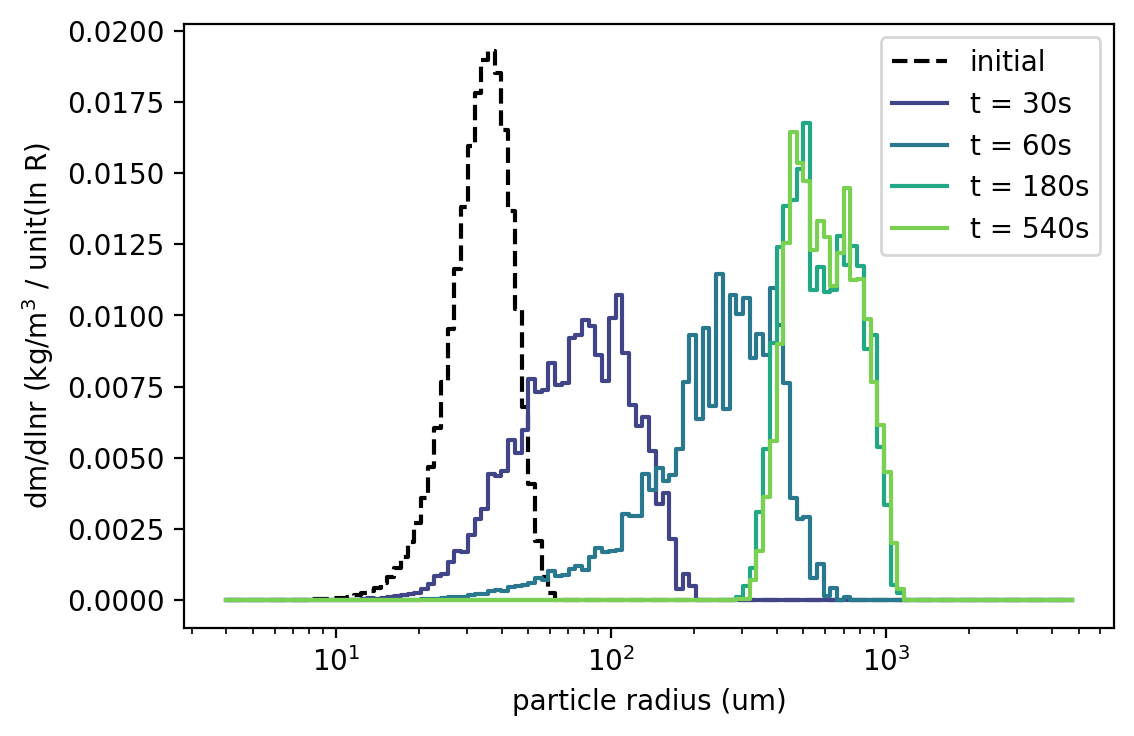

HTML(value="<a href='./fig5_straub_box.pdf' target='_blank'>./fig5_straub_box.pdf</a><br>")

In [4]:
vmin = Settings0D().X0 * 1e-3
nfmax = 10

settings = Settings0D(Straub2010Nf(vmin=vmin, nfmax=nfmax))
t_steps = [0, 30, 60, 180, 540]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

settings.n_sd = 2**13
settings.warn_overflows = False
settings.radius_bins_edges = np.logspace(
    np.log10(4.0 * si.um), np.log10(5e3 * si.um), num=128, endpoint=True
)
settings.coal_eff=Straub2010Ec()

(x,y,rates) = run_box_breakup(settings, [0])
pyplot.figure(figsize=(6,4),dpi=200)
pyplot.step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')

(x,y, rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    pyplot.step(x,y[j]*settings.rho, color=cmap(j/len(t_steps)),linestyle='-',
            label=f't = {step}s')

pyplot.xscale("log")
pyplot.xlabel("particle radius (um)")
pyplot.ylabel("dm/dlnr (kg/m$^3$ / unit(ln R)")
pyplot.legend()
show_plot('fig5_straub_box.pdf')